In [1]:
#mnist dataset
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [2]:
28*28

784

In [3]:
#Dataset parameters

num_classes = 10
num_features = 784

In [4]:
#Model parameters

learning_rate = 0.01
training_steps = 2000
batch_size = 256
display_step = 100

In [5]:
#Network parameters

n_hidden_1 = 128 #Number of neurons
n_hidden_2 = 256

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [8]:
print(x_test.shape)

(10000, 28, 28)


In [9]:
x_train, x_test=np.array(x_train, np.float32), np.array(x_test, np.float32)

In [10]:
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
x_train, x_test = x_train/255., x_test/255.     

In [12]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [13]:
#creating the neural network
class NeuralNet(Model):
  def __init__(self):
    super(NeuralNet, self).__init__()

  #first hidden layer
    self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
    self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
    self.out = layers.Dense(num_classes)

  def call(self, x, is_training=False):
    x=self.fc1(x)
    x=self.fc2(x)
    x=self.out(x)

    if not is_training:
      x=tf.nn.softmax(x)

    return x

In [14]:
neural_net=NeuralNet()

In [15]:
def cross_entropy_loss(x,y):
  y=tf.cast(y,tf.int64)
  loss=tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
  return tf.reduce_mean(loss)

In [16]:
def accuracy(y_pred, y_true):
  correct_prediction=tf.equal(tf.argmax(y_pred,1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

In [17]:
#optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [18]:
def run_optimization(x,y): 
  #wrap computation inside tf.Gradient Tape for automatic differentiation 

  with tf.GradientTape() as g: 
   pred = neural_net(x, is_training=True) 
   loss = cross_entropy_loss(pred, y) 

  trainable_variables = neural_net.trainable_variables

  gradients = g.gradient(loss, trainable_variables)

  #Update W and b

  optimizer.apply_gradients(zip(gradients, trainable_variables))

In [19]:
for x, y in enumerate ([10,20,30,40]):
  print(y)

10
20
30
40


In [20]:
#training
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  run_optimization(batch_x, batch_y)

  if step % display_step == 0:
    pred=neural_net(batch_x, is_training=True)
    loss=cross_entropy_loss(pred, batch_y)
    acc=accuracy(pred, batch_y)

    print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 1.923792, accuracy: 0.601562
step: 200, loss: 1.403319, accuracy: 0.730469
step: 300, loss: 0.992383, accuracy: 0.800781
step: 400, loss: 0.716612, accuracy: 0.847656
step: 500, loss: 0.634365, accuracy: 0.843750
step: 600, loss: 0.572795, accuracy: 0.855469
step: 700, loss: 0.433254, accuracy: 0.898438
step: 800, loss: 0.505104, accuracy: 0.847656
step: 900, loss: 0.514111, accuracy: 0.875000
step: 1000, loss: 0.308585, accuracy: 0.925781
step: 1100, loss: 0.393372, accuracy: 0.890625
step: 1200, loss: 0.467543, accuracy: 0.878906
step: 1300, loss: 0.429253, accuracy: 0.878906
step: 1400, loss: 0.382303, accuracy: 0.902344
step: 1500, loss: 0.315866, accuracy: 0.921875
step: 1600, loss: 0.319538, accuracy: 0.902344
step: 1700, loss: 0.361629, accuracy: 0.886719
step: 1800, loss: 0.429772, accuracy: 0.882812
step: 1900, loss: 0.328925, accuracy: 0.898438
step: 2000, loss: 0.334356, accuracy: 0.914062


In [21]:
pred = neural_net(x_test, is_training=False)
accuracy(pred, y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9128>

In [22]:
import matplotlib.pyplot as plt

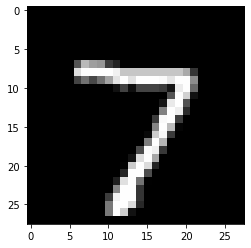

Model prediction: 7


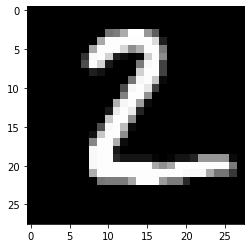

Model prediction: 2


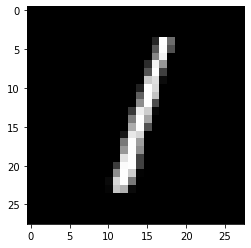

Model prediction: 1


In [27]:
n_images = 3
test_images = x_test[:n_images]
predictions = neural_net(test_images)

for each in range(n_images):
  plt.imshow(np.reshape(test_images[each],[28,28]), cmap='gray')
  plt.show()

  print("Model prediction: %i" % np.argmax(predictions.numpy()[each]))